# Analysis of PolyaClassifier site definition for *S. pombe*
## Sequence context surrounding UAG and GUA elements

**Purpose**: To identify 6mer motifs important to cleavage site definition in *S. pombe* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'schizosaccharomyces_pombe'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-6'
kmer      = 6


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_spom_context')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 2492

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/schizosaccharomyces_pombe/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-6


# ANALYSIS

## Motif in native context

### Surrounding the TAG element upstream of the cleavage site and PAS

In [8]:
motif = 'TAG'
extension = 3

mot_con_dir = mot_dis_dir.replace("motif_disruption", "motif_context").replace("-6", f"-9_core-{motif}")
print(mot_con_dir)


/projects/b1080/eks/polyadenylation/yeast/schizosaccharomyces_pombe/analysis/motif_analysis/motif_context/polyaclassifier_bagging3_kmers-9_core-TAG


#### Based on motif frequency

In [9]:
tag_count_df, tag_count_scores = motifs.analyze_motif_context(mot_con_dir, motif, extension, (-80-extension,-30-extension), 
                                                              xvariable = 'position', 
                                                              yvariable = 'differenceClassification', 
                                                              method = 'count')


Beginning to process motif edge alterations for TAG with edge 3mers. 4,096 motifs possible.


100%|██████████| 4096/4096 [01:40<00:00, 40.71it/s]


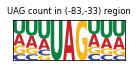

In [10]:
tag_count_ppm = motifs.visualize_motif_context(tag_count_scores, OUTDIR, motif, extension, (-80-extension,-30-extension), 
                                               method = 'count', normalize = True,
                                               plot_format = 'ppm')


/projects/b1080/eks/polyadenylation/yeast/manuscript/paper_utilities/motifs.py:694: RuntimeWarning: divide by zero encountered in log2
  ext_score = np.log2(ext_score/0.25).replace([np.inf, -np.inf], np.nan).fillna(0)


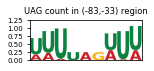

In [11]:
tag_count_pwm = motifs.visualize_motif_context(tag_count_scores, OUTDIR, motif, extension, (-80-extension,-30-extension), 
                                               method = 'count', normalize = True,
                                               plot_format = 'pwm', ylim = (0,1.25), ytickint = 0.25)


#### Based on motif importance

In [12]:
tag_imp_df, tag_imp_scores = motifs.analyze_motif_context(mot_con_dir, motif, extension, (-80-extension,-30-extension), 
                                                          xvariable = 'position', 
                                                          yvariable = 'differenceClassification', 
                                                          method = 'mean')


Beginning to process motif edge alterations for TAG with edge 3mers. 4,096 motifs possible.


100%|██████████| 4096/4096 [01:38<00:00, 41.54it/s]


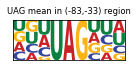

In [13]:
tag_imp_ppm = motifs.visualize_motif_context(tag_imp_scores, OUTDIR, motif, extension, (-80-extension,-30-extension), 
                                             method = 'mean', normalize = True,
                                             plot_format = 'ppm')


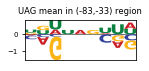

In [14]:
tag_imp_pwm = motifs.visualize_motif_context(tag_imp_scores, OUTDIR, motif, extension, (-80-extension,-30-extension), 
                                             method = 'mean', normalize = True,
                                             plot_format = 'pwm')


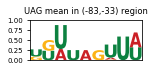

In [15]:
tag_imp_pwm = motifs.visualize_motif_context(tag_imp_scores, OUTDIR, motif, extension, (-80-extension,-30-extension), 
                                             method = 'mean', normalize = True,
                                             plot_format = 'pwm', ylim = (0, 1), ytickint = 0.25)


### Surrounding the GTA element downstream of the cleavage site

In [16]:
motif = 'GTA'
extension = 3

mot_con_dir = mot_dis_dir.replace("motif_disruption", "motif_context").replace("-6", f"-9_core-{motif}")
print(mot_con_dir)


/projects/b1080/eks/polyadenylation/yeast/schizosaccharomyces_pombe/analysis/motif_analysis/motif_context/polyaclassifier_bagging3_kmers-9_core-GTA


#### Based on motif frequency

In [17]:
gta_count_df, gta_count_scores = motifs.analyze_motif_context(mot_con_dir, motif, extension, (15-extension,60-extension), 
                                                              xvariable = 'position', 
                                                              yvariable = 'differenceClassification', 
                                                              method = 'count')


Beginning to process motif edge alterations for GTA with edge 3mers. 4,096 motifs possible.


100%|██████████| 4096/4096 [01:43<00:00, 39.49it/s]


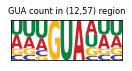

In [18]:
gta_count_ppm = motifs.visualize_motif_context(gta_count_scores, OUTDIR, motif, extension, (15-extension,60-extension), 
                                               method = 'count', normalize = True,
                                               plot_format = 'ppm')


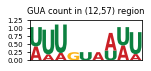

In [19]:
gta_count_pwm = motifs.visualize_motif_context(gta_count_scores, OUTDIR, motif, extension, (15-extension,60-extension), 
                                               method = 'count', normalize = True,
                                               plot_format = 'pwm', ylim = (0,1.25), ytickint = 0.25)


#### Based on motif importance

In [20]:
gta_imp_df, gta_imp_scores = motifs.analyze_motif_context(mot_con_dir, motif, extension, (15-extension,60-extension), 
                                                          xvariable = 'position', 
                                                          yvariable = 'differenceClassification', 
                                                          method = 'mean')


Beginning to process motif edge alterations for GTA with edge 3mers. 4,096 motifs possible.


100%|██████████| 4096/4096 [01:40<00:00, 40.69it/s]


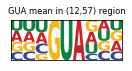

In [21]:
gta_imp_ppm = motifs.visualize_motif_context(gta_imp_scores, OUTDIR, motif, extension, (15-extension,60-extension), 
                                             method = 'mean', normalize = True,
                                             plot_format = 'ppm')


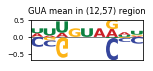

In [22]:
gta_imp_pwm = motifs.visualize_motif_context(gta_imp_scores, OUTDIR, motif, extension, (15-extension,60-extension), 
                                             method = 'mean', normalize = True,
                                             plot_format = 'pwm')


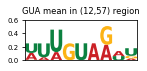

In [26]:
gta_imp_pwm = motifs.visualize_motif_context(gta_imp_scores, OUTDIR, motif, extension, (15-extension,60-extension), 
                                             method = 'mean', normalize = True,
                                             plot_format = 'pwm', ylim = (0,0.6), ytickint = 0.2)
